# EDA for Used Car Data

<div class="alert alert-block alert-info">
    
### Source Dataset :  

9996 used car listings scraped from a car website and augmented with additional data.
Please refer to the file UsedCarDataPreparation for details on the data synthesis

### EDA Objectives: 

1. Describe basic statistical data of the dataset
2. Explore data quality - Variances, Missing Values, Outliers, Distributions, Skewness
3. Perform necessary data conversions - encoding, normalization, scaling
4. Explore relationships
5. Execute basic feature selection 
9. Execute initial basic model and explore results.

</div>



In [48]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
pd.set_option('display.max_colwidth',None)
pd.set_option('display.float_format',lambda x: '%.2f' %x)
pd.set_option('display.max_rows',300)
pd.set_option('display.max_columns',None)
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport
from sklearn.preprocessing import MinMaxScaler 
import numpy as np
from sklearn.impute import KNNImputer
from scipy.stats import iqr


In [49]:
# Helper function
def findcolumntypes(dataframe):
    assert isinstance(dataframe,pd.DataFrame)
    allcolumns = dataframe.columns.to_list()
    numericals = dataframe._get_numeric_data().columns.to_list()
    categoricals = list(set(allcolumns) - set(numericals))
    collist =  dict(numeric = numericals,  categorical = categoricals)
    return collist

## <span style="color:Blue"> Step 1: Read dataset, describe basic statistical data of the dataset </span>

In [50]:
# read the cars data from csv
df = pd.read_csv('cardata_final.csv',encoding = "ISO-8859-1",index_col=False)

In [51]:
# Number of examples
len(df)

9996

In [52]:
#df.drop(columns = ['listid'],inplace = True)
df.head(5)

,vin,year,make,model,trim,pricecategory,price,mileage,city,state,colorexterior,colorinterior,accidenthist,owner,usage,discount,cartype,ReliabilityRank,CostOfLivingRank,CostOfLivingIndex,TransportationIndex,BrandPercentSales,BrandAvgDaysToTurn,CarClass,ReviewScore,AvgMPG
0,WBY1Z2C51FV286674,2015,BMW,I3,60 AH,FAIR PRICE,15991,21493,BELLEVUE,WA,SILVER,GRAY,1,2,PERSONAL,N,HATCHBACK,8.00,39,112.20,118.60,1.78,74.00,LUXURY HYBRID CARS,7.50,113.00
1,2GNAXHEV4J6220616,2018,CHEVROLET,EQUINOX,LS WITH 1LS FWD,FAIR PRICE,14899,37071,NORCO,CA,BLACK,GRAY,0,1,PERSONAL,Y,SUV,9.00,49,142.70,133.00,11.69,78.23,AFFORDABLE COMPACT SUVS,8.40,29.00
2,4S3GTAD6XK3741106,2019,SUBARU,IMPREZA,2.0I PREMIUM 5-DOOR CVT,FAIR PRICE,19220,15914,STAFFORD,TX,RED,BEIGE,0,1,PERSONAL,N,SEDAN,23.00,14,91.70,91.10,4.13,23.23,AFFORDABLE SMALL CARS,7.70,33.00
3,2C4RDGCG8KR551301,2019,DODGE,GRAND CARAVAN,SXT,EXCELLENT PRICE,12993,42070,OCALA,FL,GRAY,BLACK,0,1,PERSONAL,Y,VAN/MINIVAN,25.00,27,99.20,98.70,2.13,98.54,MINIVANS,6.80,21.00
4,5YFEPRAEXLP047434,2020,TOYOTA,COROLLA,LE CVT,EXCELLENT PRICE,13800,18725,BOERNE,TX,WHITE,BLACK,0,1,PERSONAL,N,HATCHBACK,5.00,14,91.70,91.10,12.19,43.23,HATCHBACKS,7.90,32.00


In [53]:
# Basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9996 entries, 0 to 9995
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   vin                  9996 non-null   object 
 1   year                 9996 non-null   int64  
 2   make                 9996 non-null   object 
 3   model                9996 non-null   object 
 4   trim                 9996 non-null   object 
 5   pricecategory        9996 non-null   object 
 6   price                9996 non-null   int64  
 7   mileage              9996 non-null   int64  
 8   city                 9996 non-null   object 
 9   state                9996 non-null   object 
 10  colorexterior        9996 non-null   object 
 11  colorinterior        9996 non-null   object 
 12  accidenthist         9996 non-null   int64  
 13  owner                9996 non-null   int64  
 14  usage                9996 non-null   object 
 15  discount             9996 non-null   o

In [54]:
collist = findcolumntypes(df)
print('Numeric columns({})      ==> {}'.format(len(collist['numeric']),collist['numeric']))
print('\n')
print('Categorical columns({})     ==> {}'.format(len(collist['categorical']),collist['categorical']))

Numeric columns(13)      ==> ['year', 'price', 'mileage', 'accidenthist', 'owner', 'ReliabilityRank', 'CostOfLivingRank', 'CostOfLivingIndex', 'TransportationIndex', 'BrandPercentSales', 'BrandAvgDaysToTurn', 'ReviewScore', 'AvgMPG']


Categorical columns(13)     ==> ['city', 'pricecategory', 'discount', 'trim', 'CarClass', 'cartype', 'make', 'model', 'state', 'colorinterior', 'colorexterior', 'vin', 'usage']


In [55]:
df.describe()

,year,price,mileage,accidenthist,owner,ReliabilityRank,CostOfLivingRank,CostOfLivingIndex,TransportationIndex,BrandPercentSales,BrandAvgDaysToTurn,ReviewScore,AvgMPG
count,9996.00,9996.00,9996.00,9996.00,9996.00,9917.00,9996.00,9996.00,9996.00,9922.00,9903.00,8009.00,8009.00
mean,2016.37,16689.62,54300.30,0.19,1.43,14.41,26.06,105.00,103.51,6.80,70.64,7.82,28.53
std,3.95,8986.47,46084.86,0.47,0.91,6.83,14.40,19.57,13.85,4.36,15.83,0.60,6.49
min,1997.00,1500.00,6.00,0.00,0.00,2.00,1.00,84.70,81.10,0.00,23.23,5.30,15.00
25%,2015.00,10596.75,25903.00,0.00,1.00,9.00,14.00,91.70,93.20,2.22,57.92,7.40,25.00
50%,2018.00,15599.00,35863.50,0.00,1.00,14.00,27.00,99.20,98.70,6.29,74.23,7.90,29.50
75%,2019.00,19995.00,73117.75,0.00,2.00,18.00,38.00,108.80,108.70,11.69,78.23,8.20,33.00
max,2020.00,74227.00,395720.00,5.00,10.00,32.00,52.00,197.60,146.60,13.83,123.69,9.30,131.00


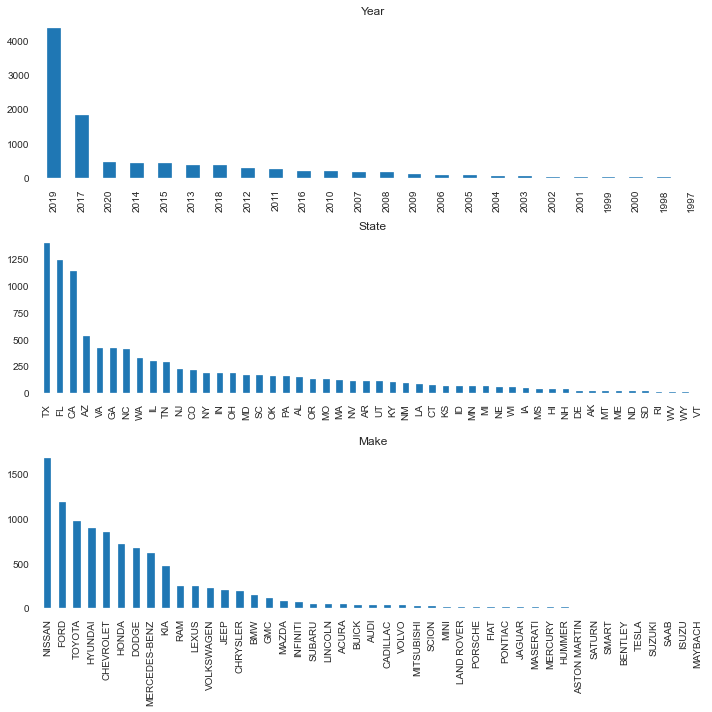

In [56]:
# Check data distributions by State Year and Make
fig,  (ax1, ax2, ax3) = plt.subplots(3, 1,figsize = (10,10))
df['year'].value_counts().plot(kind = 'bar',ax = ax1)
ax1.set_title("Year")
df['state'].value_counts().plot(kind = 'bar',ax = ax2)
ax2.set_title("State")
df['make'].value_counts().plot(kind = 'bar',ax = ax3)
ax3.set_title("Make")
fig.tight_layout()

<div class="alert alert-block alert-success">
    
### Results and Observations for Step 1 - Basic Stats on data :

1. 31 columns are present in the data set. 15 numerical and 16 categorical attributes.
    
2. As this data set is generated as part of data acquisition phase of this project , _most of the data is already standardized during the data synthesis process_.   
    
3. "vin" may not be an important feature for price determination, but it can help as an unique identifier.
    
4. Nulls observed in "cartype","ReliabilityRank","BrandPercentSales", "BrandAvgDaysToTurn","ReviewScore". This is due to unavailability of additional data for review s
    
5. Proposed target variables - "price" and "pricecategory" are all non-null, no imputations required for them. 
    
6. 25% of the cars in the listing are older than 2015.   2019 cars are most frequent in the listing.
    
7. 75% of the listings have prices within 20k. Typical of used car values for cars older than 2 years.
    
8. There are cars listed with as many as 10 owners.
    
9. Listing location is skewed towards the states TX, FL, CA. 
    
10. Nissan, Ford, Toyota, Hyndai, Chevrolet and Honda are the most frequently occuring Makes in the listing.
    
</div>


## <span style="color:Blue"> Step 2: Explore data quality - Variances, Missing Values, Outliers, Distributions, Skewness </span>

### Missing data handling


#### Step 2.1 : Identfication of fields with missing data in the dataset

In [57]:
df.isnull().sum() * 100 / len(df)

vin                    0.00
year                   0.00
make                   0.00
model                  0.00
trim                   0.00
pricecategory          0.00
price                  0.00
mileage                0.00
city                   0.00
state                  0.00
colorexterior          0.00
colorinterior          0.00
accidenthist           0.00
owner                  0.00
usage                  0.00
discount               0.00
cartype                0.73
ReliabilityRank        0.79
CostOfLivingRank       0.00
CostOfLivingIndex      0.00
TransportationIndex    0.00
BrandPercentSales      0.74
BrandAvgDaysToTurn     0.93
CarClass              19.88
ReviewScore           19.88
AvgMPG                19.88
dtype: float64

<div class="alert alert-block alert-danger">
   
    
**Nulls observed in the following fields:**
    

    
    cartype               0.73 %
    ReliabilityRank       3.62 %    
    BrandPercentSales     0.74 %
    BrandAvgDaysToTurn    0.93 %
    CarClass              19.88 %
    ReviewScore           19.88 %
    AvgMPG                19.88 %
    
   
</div>

#### Step 2.2 - Find and impute missing values for each column that have missing values

For initial pass, as a general rule, :
    
    the Mean() of the atrribute for the Make is used for imputing numeric data
    the Mode() of the atrribute for the Make is used for imputing categorical data

In [68]:
df[df['AvgMPG'].isnull()][['make','cartype']].drop_duplicates().values

array([['CHEVROLET', 'VAN/MINIVAN'],
       ['MERCEDES-BENZ', 'SEDAN'],
       ['MERCEDES-BENZ', 'SUV'],
       ['FORD', 'SEDAN'],
       ['HONDA', 'SUV'],
       ['MAZDA', 'VAN/MINIVAN'],
       ['RAM', 'PICKUP'],
       ['ACURA', 'SEDAN'],
       ['CHRYSLER', 'VAN/MINIVAN'],
       ['HUMMER', 'SUV'],
       ['MAZDA', 'SUV'],
       ['LAND ROVER', 'SUV'],
       ['LEXUS', 'SEDAN'],
       ['LEXUS', 'SUV'],
       ['MERCEDES-BENZ', 'CONVERTIBLE'],
       ['DODGE', 'WAGON'],
       ['FORD', 'PICKUP'],
       ['NISSAN', 'SUV'],
       ['BUICK', 'SEDAN'],
       ['CHEVROLET', 'COUPE'],
       ['JAGUAR', 'COUPE'],
       ['CHRYSLER', 'COUPE'],
       ['SCION', 'HATCHBACK'],
       ['FORD', 'VAN/MINIVAN'],
       ['MITSUBISHI', 'HATCHBACK'],
       ['TOYOTA', 'SEDAN'],
       ['TOYOTA', 'WAGON'],
       ['BMW', 'SEDAN'],
       ['ISUZU', 'SUV'],
       ['BUICK', nan],
       ['MERCURY', nan],
       ['VOLVO', 'WAGON'],
       ['PONTIAC', 'SEDAN'],
       ['FORD', nan],
       ['MERCEDES-BEN

24.986935341009744

In [81]:
df['cartype'].mode().values[0]

'SEDAN'

In [83]:
# impute the missing value with that value

# cartype               0.73 %
# ReliabilityRank       3.62 %    
# BrandPercentSales     0.74 %
# BrandAvgDaysToTurn    0.93 %
# CarClass              19.88 %
# ReviewScore           19.88 %
# AvgMPG                19.88 %

for make in df[df['cartype'].isnull()]['make'].unique():
    modevalmake = df[df['make'] == make]['cartype'].mode().values
    modevalall = df['cartype'].mode().values 
    mode = modevalmake[0] if modevalmake is not None else modevalall[0]
    print(f"Imputing cartype Mode = {modeval} for Make = {make}...")
    #mask = (df['cartype'].isnull()) & (df['make'] == make)
    #df.loc[mask, 'cartype'] = df.loc[mask, 'cartype'].fillna(modeval)  

# impute CarClass with mode CarClass of make
# for make in df[df['CarClass'].isnull()]['make'].unique():
#     modeval = df_rat[df_rat['Make'] == make]['CarClass'].mode().values[0]
#     print(f"Imputing CarClass Mode = {modeval} for Make = {makes}...")
#     mask = (df['CarClass'].isnull()) & (df['make'] == make)
#     df.loc[mask, 'CarClass'] = df.loc[mask, 'CarClass'].fillna(modeval)      
    
# # impute ReviewScore with mean ReviewScore of make
# for make in df[df['ReviewScore'].isnull()]['make'].unique():
#     meanval = df_rat[df_rat['Make'] == make]['ReviewScore'].mean().values[0]
#     print(f"Imputing ReviewScore Mean = {meanval} for Make = {makes}...")
#     mask = (df['ReviewScore'].isnull()) & (df['make'] == make)
#     df.loc[mask, 'ReviewScore'] = df.loc[mask, 'ReviewScore'].fillna(modeval)   
    
# # impute ReviewScore with mean ReviewScore of make    
# for make in df[df['AvgMPG'].isnull()]['make'].unique():
#     meanval = df_rat[df_rat['Make'] == make]['AvgPaidPrice'].mean().values[0]
#     print(f"Imputing AvgPaidPrice Mean = {meanval} for Make = {makes}...")
#     mask = (df['AvgPaidPrice'].isnull()) & (df['make'] == make)
#     df.loc[mask, 'AvgPaidPrice'] = df.loc[mask, 'AvgPaidPrice'].fillna(modeval)   
    
    

    
    
    

Imputing cartype Mode = SEDAN for Make = BUICK...
Imputing cartype Mode = SEDAN for Make = MERCURY...
Imputing cartype Mode = SEDAN for Make = FORD...
Imputing cartype Mode = SEDAN for Make = MERCEDES-BENZ...
Imputing cartype Mode = SEDAN for Make = INFINITI...
Imputing cartype Mode = SEDAN for Make = CHRYSLER...


IndexError: index 0 is out of bounds for axis 0 with size 0

,vin,year,make,model,trim,pricecategory,price,mileage,city,state,...,owner,usage,discount,cartype,ReliabilityRank,CostOfLivingRank,CostOfLivingIndex,TransportationIndex,BrandPercentSales,BrandAvgDaysToTurn


**Column** : ReliabilityRank

**Datatype** : ordinal

**Impute strategy** : mode

In [155]:
df[df['ReliabilityRank'].isnull()][['make']].drop_duplicates()

,make
205,RAM
305,HUMMER
332,FIAT
364,LAND ROVER
627,JAGUAR
683,SCION
837,ISUZU
855,MERCURY
1006,PONTIAC
2005,SATURN


In [158]:
df[df['ReliabilityRank'].isnull()][['make','BrandPercentSales']].drop_duplicates()

,make,BrandPercentSales
205,RAM,4.14
305,HUMMER,nan
332,FIAT,0.04
364,LAND ROVER,0.56
627,JAGUAR,0.18
683,SCION,nan
837,ISUZU,nan
855,MERCURY,nan
1006,PONTIAC,nan
2005,SATURN,nan


**Column** : BrandPercentSales

**Column** : BrandAvgDaysToTurn

#### Step 2.3 - Verify if there are any other missing values

### Outliers and scale analysis


#### Step 2.4 : Identfication of ouliers and out of scale data

### Data distributions 


<div class="alert alert-block alert-success">
    
### Results and Observations for Step 2 - Handling missing data and outliers:

1. All missing data were imputed based on the logic described above.
    
2. Outliers have been detected and removed.
    
</div>


## <span style="color:Blue"> Step 3: Perform necessary data conversions - encoding, normalization, scaling </span>

<div class="alert alert-block alert-success">
    
### Results and Observations for Step 2 - Perform necessary data conversions - encoding, normalization, scaling:


    
</div>


## <span style="color:Blue"> Step 4: Explore relationships </span>

<div class="alert alert-block alert-success">
    
### Results and Observations for Step 3 - Explore relationships:


    
</div>


## <span style="color:Blue"> Step 5: Execute basic feature selection </span>

<div class="alert alert-block alert-success">
    
### Results and Observations for Step 5 - Execute basic feature selection:


    
</div>


## <span style="color:Blue"> Step 6: Execute initial basic model and explore results </span>

<div class="alert alert-block alert-success">
    
### Results and Observations for Step 6 - Execute initial basic model and explore results:


    
</div>


# -------------------------------------------------------------------------------------------------------------